In [1]:
!pip install scikit-fuzzy

  Using cached scikit_fuzzy-0.4.2-py3-none-any.whl
  Using cached scipy-1.9.3-cp310-cp310-macosx_10_9_x86_64.whl (34.3 MB)
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

names = ['low', 'normal', 'high']

/usr/local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


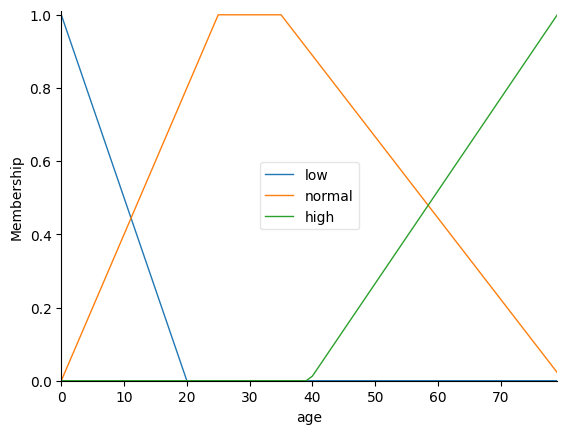

In [3]:
# FUSSIFICATION
MIN = 0; MAX = 80
age = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'age')
age.automf(3, names=names)
age['low'] = fuzz.membership.trimf(np.arange(MIN,MAX, 1), [0,0,20])
age['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [0,25,35,80])
age.view()
## NOTE that not all support point sum up to 1 (which may be an issue!!! (correct it) 

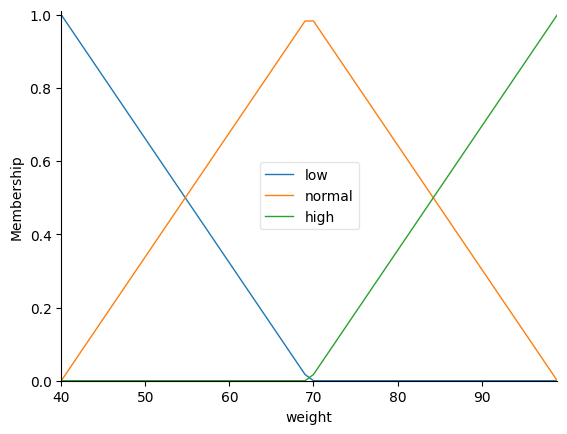

In [4]:
MIN = 40; MAX = 100
weight = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'weight')
weight.automf(3, names=names)
weight.view()

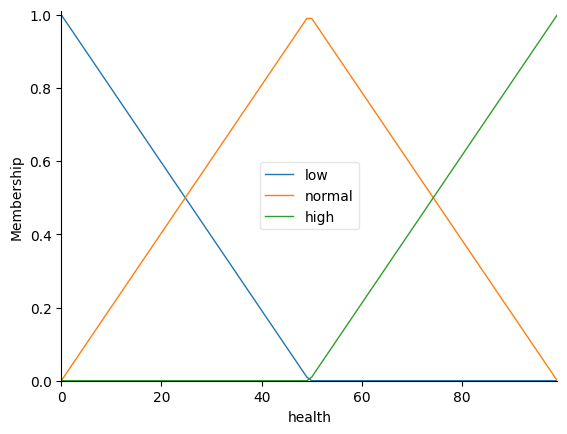

In [5]:
MIN = 0; MAX = 100
health = ctrl.Consequent(np.arange(MIN,MAX, 1), 'health')
health.automf(3, names=names)
health.view()

In [6]:
## FUZZY RULES
#rule1 = ctrl.Rule(weight['normal'], health['high'])
rule2 = ctrl.Rule(weight['low'] & age['high'], health['low'])
rule3 = ctrl.Rule(weight['low'] | age['low'], health['normal'])
#rule4 = ctrl.Rule(weight['high'], health['low'])
problem_ctrl  = ctrl.ControlSystem([rule2, rule3])
problem = ctrl.ControlSystemSimulation(problem_ctrl)

47.267524449423114


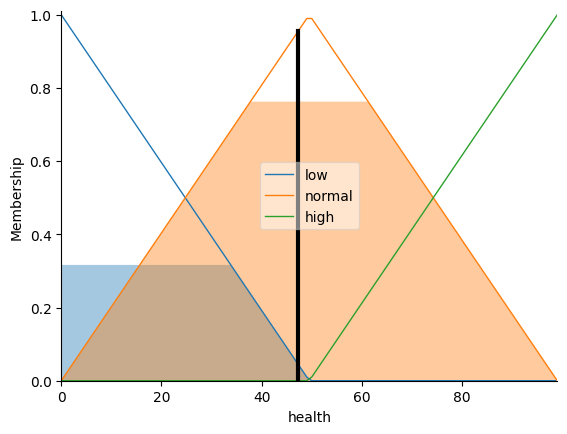

In [7]:
## APPLICATION
problem.input['age'] = 52
problem.input['weight'] = 47

problem.compute()

print(problem.output['health'])
health.view(sim=problem)